In [1]:
# Download the experimental data
import pydicom

pydicom.data.fetch_data_files()

In [2]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = get_testdata_file("CT_small.dcm")
print(path) # incremental to the core file
ds = dcmread(path)
print(type(ds.PixelData))
print(len(ds.PixelData))

# Data shows in bytes
print(ds.PixelData[:2])


C:\Users\Olyni\AppData\Local\Programs\Python\Python39\Lib\site-packages\pydicom\data\test_files\CT_small.dcm
<class 'bytes'>
32768
b'\xaf\x00'


In [5]:
arr = ds.pixel_array
print(arr.shape)

# Data could be shown in numpy array
print(arr[:3])

(128, 128)
[[ 175  180  166  143  139  152  167  187  212  236  229  213  203  205
   191  204  207  197  192  186  191  206  252  326  362  338  313  261
   225  213  208  188  179  206  210  199  192  216  251  227  207  203
   206  211  237  349  603  825  958 1053 1028 1034 1052 1035 1044 1043
  1004  995  978  947  936  927  936  970 1002  991  987  994 1007 1041
  1080 1108 1129 1175 1191 1184 1176 1198 1205 1192 1178 1174 1189 1165
  1183 1190 1182 1180 1174 1203 1200 1183 1185 1183 1183 1160 1145 1160
  1160 1150 1162 1168 1173 1176 1164 1173 1151 1099  985  762  634  480
   311  220  157  148  156  187  205  189  145  134  148  187  221  203
   207  216]
 [ 186  183  157  147  157  157  163  193  209  206  193  188  182  185
   196  213  208  210  201  197  199  203  237  306  347  344  354  328
   279  236  218  213  234  269  267  237  219  229  233  204  209  208
   207  215  240  377  657  851  938 1025 1024 1033 1034 1024 1034 1025
   999  988  980  977  981  951  931  95

In [35]:
import sys, os
path_to_file = "E:\dev\Data\CT_data_batch1\+1\DICOM_anon\i0000,0000b.dcm"
print(os.join(".", os.path("E:\dev\Data\CT_data_batch1\+1"))

SyntaxError: unexpected EOF while parsing (2193441047.py, line 3)

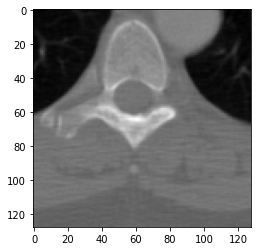

In [4]:
import matplotlib.pyplot as plt

path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

2
123


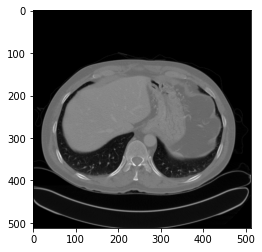

In [7]:
import sys, os
# print(os.listdir("E:\dev\Data\CT_data_batch1\+1\DICOM_anon"))
ds = dcmread("E:\dev\Part_2\Data\CT_data_batch1/2\DICOM_anon\i0011,0000b.dcm")
print(ds.PatientID)
ds.PatientID = "123"
print(ds.PatientID)
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()
# To save file need use
# ds.save_as("path_to_file")

In [ ]:
# Get summary of file
print(ds)

In [37]:
print(ds.PatientName)
# or
print(ds[0x10, 0x10].value)

CompressedSamples^CT1
CompressedSamples^CT1


In [41]:
import pydicom.sequence # import pydicom.sequence.Sequence - doesn't work
filename = get_testdata_file("CT_small.dcm")
ds = pydicom.dcmread(filename)
# print(ds.BeamSequence[0].BeamName)

In [ ]:
ds.BeamSequence[0].BeamName
# print(ds.BeamSequence[0])
# print(ds.BeamSequence)

In [ ]:
from pydicom.tag import Tag
# Tags created beforehead
t1 = Tag("PatientNome")
print(type(t1))

In [ ]:
# Changing some of pixels
# example: zero anything < 300
arr = ds.pixel_array
arr[arr < 300] = 0

# Saving...
ds.PixelData = arr.tobytes()
ds.save_as("temp.dcm")

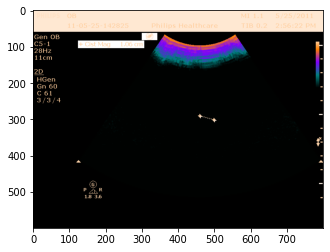

In [63]:
from pydicom.pixel_data_handlers.util import apply_color_lut

fname = get_testdata_file("OBXXXX1A.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
rgb = apply_color_lut(arr, palette='PET')
plt.imshow(rgb)
plt.show()

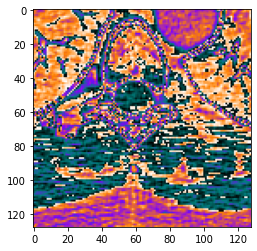

In [66]:
from pydicom.pixel_data_handlers.util import apply_modality_lut

fname = get_testdata_file("CT_small.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
rgb = apply_color_lut(arr, palette='PET')
plt.imshow(rgb)
plt.show()

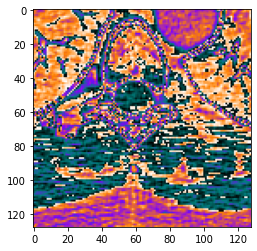

In [67]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

out = apply_voi_lut(rgb, ds, index=0)
plt.imshow(out)
plt.show()

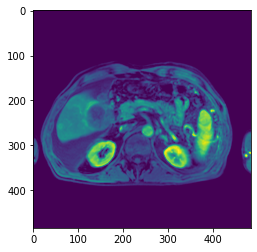

In [71]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

fname = get_testdata_file("MR-SIEMENS-DICOM-WithOverlays.dcm")
ds = dcmread(fname)
arr = ds.pixel_array
out = apply_voi_lut(arr, ds, index=0)
# plt.imshow(arr)
plt.imshow(out)
plt.show()